In [1]:
import os
import sys
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets, splits
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split

In [2]:
root = '../../datasets/raptor_individuals_new'

In [3]:
from data.raptors_wildlife import Raptors, RaptorsWildlife

ds = Raptors(root)

In [4]:
raptors = RaptorsWildlife(root=root)
ds = raptors.wildlife_dataset()

In [5]:
df = ds.df
df

,id,species,identity_id,identity,path,from_video,video,date
0,0,whteag,0,England_G818,../../datasets/raptor_individuals_new/whteag/E...,False,None,2024
1,1,whteag,0,England_G818,../../datasets/raptor_individuals_new/whteag/E...,False,None,2024
2,2,whteag,0,England_G818,../../datasets/raptor_individuals_new/whteag/E...,False,None,2024
3,3,whteag,1,England_G471,../../datasets/raptor_individuals_new/whteag/E...,False,None,2021
4,4,whteag,1,England_G471,../../datasets/raptor_individuals_new/whteag/E...,False,None,2022
...,...,...,...,...,...,...,...,...
2503,2503,goleag,71,SouthScotland_tallaF15,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
2504,2504,goleag,71,SouthScotland_tallaF15,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
2505,2505,goleag,72,SouthScotland_sulaB50,../../datasets/raptor_individuals_new/goleag/S...,False,None,2022
2506,2506,goleag,72,SouthScotland_sulaB50,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000


In [6]:
# closed-set split, where each individual has samples in both the training and testing sets.
splitter = splits.ClosedSetSplit(0.8)
for idx_train, idx_test in splitter.split(df):
    splits.analyze_split(df, idx_train, idx_test)


Split: time-unaware closed-set
Samples: train/test/unassigned/total = 1996/512/0/2508
Classes: train/test/unassigned/total = 72/69/0/72
Samples: train only/test only        = 3/0
Classes: train only/test only/joint  = 3/0/69

Fraction of train set     = 79.59%
Fraction of test set only = 0.00%


In [7]:
df_train, df_test = df.loc[idx_train], df.loc[idx_test]

In [8]:
df_train

,id,species,identity_id,identity,path,from_video,video,date
1023,1023,goleag,35,Alabama_natchez,../../datasets/raptor_individuals_new/goleag/A...,False,None,2000
1036,1036,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2022
1034,1034,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
1033,1033,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2000
1035,1035,goleag,38,Bernheim_athena,../../datasets/raptor_individuals_new/goleag/B...,False,None,2023
...,...,...,...,...,...,...,...,...
2337,2337,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,True,abernethy-male-h03-chasing-wood-pigeon-august-...,2000
2334,2334,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,False,None,2000
2336,2336,goleag,67,SouthScotland_thistleH03,../../datasets/raptor_individuals_new/goleag/S...,True,abernethy-male-h03-chasing-wood-pigeon-august-...,2000
632,632,osprey,18,blue_DF,../../datasets/raptor_individuals_new/osprey/b...,False,None,2017


In [9]:
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split

Number of identitites            72
Number of all animals            2508
Number of animals with one image 3
Number of unidentified animals   0
Number of videos                 133
Images span                      0 days


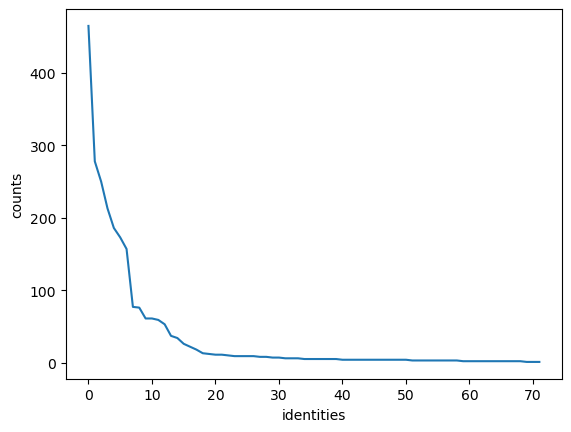

In [10]:
display_statistics(df)

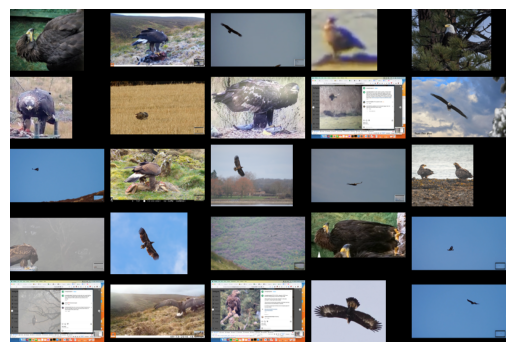

In [11]:
ds.plot_grid(n_cols=5);

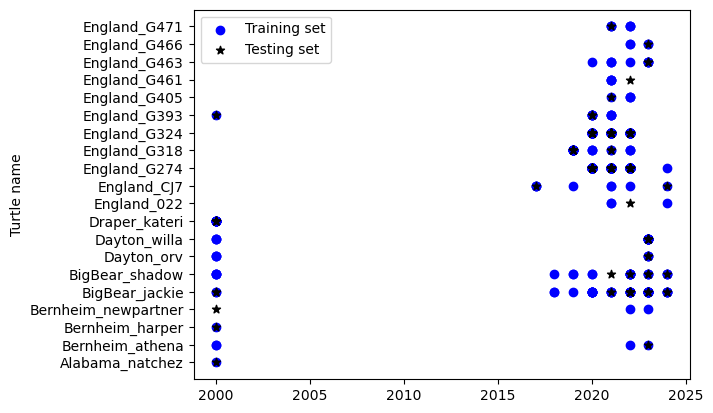

In [12]:
visualize_split(df_train, df_test, selection=20)

In [13]:
from wildlife_tools.data.dataset import WildlifeDataset
import torchvision.transforms as T

transform = T.Compose([T.Resize([224, 224]), T.ToTensor(), T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))])
dataset = RaptorsWildlife(df, root, transform=transform)

In [14]:
dataset_database = WildlifeDataset(df.iloc[100:,:], ds.root, transform=transform)
dataset_query = WildlifeDataset(df.iloc[:100,:], ds.root, transform=transform)

In [15]:
import timm
from wildlife_tools.features.deep import DeepFeatures

name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor = DeepFeatures(timm.create_model(name, num_classes=0, pretrained=True))
query, database = extractor(dataset_query), extractor(dataset_database)

 21%|█████████████▍                                                  | 4/19 [00:59<03:43, 14.88s/it]


KeyboardInterrupt: 

In [ ]:
from wildlife_tools.similarity.cosine import CosineSimilarity

similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)

In [ ]:
print(similarity['default'].shape)

(100, 2408)


In [2]:
from collections import defaultdict
import numpy as np
import torch
import pandas as pd


class KnnClassifier:
    """
    Predict query label as k labels of nearest matches in database. If there is tie at given k,
    prediction from k-1 is used. Input is similarity matrix with `n_query` x `n_database` shape.


    Args:
        k: use k nearest in database for the majority voting.
        database_labels: list of labels in database. If provided, decode predictions to database
        (e.g. string) labels.
    Returns:
        1D array with length `n_query` of database labels (col index of the similarity matrix).
    """

    def __init__(self, k: int = 1, database_labels: np.array = None):
        self.k = k
        self.database_labels = database_labels

    def __call__(self, similarity):
        similarity = torch.tensor(similarity, dtype=float)
        scores, idx = similarity.topk(k=self.k, dim=1)
        print(idx)
        pred = self.aggregate(idx)[:, self.k - 1]

        if self.database_labels is not None:
            pred = self.database_labels[pred]
        return pred

    def aggregate(self, predictions):
        """
        Aggregates array of nearest neighbours to single prediction for each k.
        If there is tie at given k, prediction from k-1 is used.

        Args:
            array of with shape [n_query, k] of nearest neighbours.
        Returns:
            array with predictions [n_query, k]. Column dimensions are predictions for [k=1,...,k=k]
        """

        results = defaultdict(list)
        for k in range(1, predictions.shape[1] + 1):
            for row in predictions[:, :k]:
                vals, counts = np.unique(row, return_counts=True)
                best = vals[np.argmax(counts)]

                counts_sorted = sorted(counts)
                if (len(counts_sorted)) > 1 and (counts_sorted[0] == counts_sorted[1]):
                    best = None
                results[k].append(best)

        results = pd.DataFrame(results).T.fillna(method="ffill").T
        return results.values
    
class KnnMatcher:
    """
    Find nearest match to query in existing database of features.
    Combines CosineSimilarity and KnnClassifier.
    """

    def __init__(self, database, k=1):
        self.similarity = CosineSimilarity()
        self.database = database
        self.classifier = KnnClassifier(
            database_labels=self.database.labels_string, k=k
        )

    def __call__(self, query):
        if isinstance(query, list):
            query = np.concatenate(query)

        if not isinstance(query, np.ndarray):
            raise ValueError("Query should be array or list of features.")

        sim_matrix = self.similarity(query, self.database.features)["cosine"]
        return self.classifier(sim_matrix)



In [ ]:
import numpy as np

classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
predictions = classifier(similarity['default'])
accuracy = np.mean(dataset_query.labels_string == predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 10.00%


/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_54382/2343340979.py:55: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


## Training with TripletLoss

In [3]:
import sys
sys.path.append('..')
from wildlife_datasets import datasets, splits

from torch.utils.data import DataLoader
from torchvision import transforms
from data.raptors_wildlife import Raptors, RaptorsWildlife

root = '../../datasets/raptor_individuals_new'
dataset = Raptors(root)
df = dataset.df

# closed-set split, where each individual has samples in both the training and testing sets.
splitter = splits.ClosedSetSplit(0.8)
for idx_train, idx_test in splitter.split(df):
    splits.analyze_split(df, idx_train, idx_test)

df_train, df_test = df.loc[idx_train], df.loc[idx_test]
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

dataset_train = RaptorsWildlife(df_train, root, transform=transform)
dataset_database = RaptorsWildlife(df_test.iloc[100:,:], root, transform=transform)
dataset_query = RaptorsWildlife(df_test.iloc[:100,:], root, transform=transform)

# Create dataloaders
train_loader = DataLoader(dataset_train, batch_size=8, shuffle=True)
query_loader = DataLoader(dataset_database, batch_size=8, shuffle=False)
database_loader = DataLoader(dataset_database, batch_size=8, shuffle=False)

Split: time-unaware closed-set
Samples: train/test/unassigned/total = 1996/512/0/2508
Classes: train/test/unassigned/total = 72/69/0/72
Samples: train only/test only        = 3/0
Classes: train only/test only/joint  = 3/0/69

Fraction of train set     = 79.59%
Fraction of test set only = 0.00%


In [4]:
import torch
import torch.nn.functional as F
import pytorch_lightning as pl
from pytorch_metric_learning import losses, miners
from torch import nn
import timm


class TripletLightningModel(pl.LightningModule):
    def __init__(self, backbone_model_name, embedding_size=128, margin=0.2, mining_type="semihard", lr=0.001):
        super().__init__()
        # Backbone (ResNet without the final FC layer)
        self.backbone = timm.create_model(model_name=backbone_model_name, pretrained=True, num_classes=0)
        # Embedder (to project features into the desired embedding space)
        self.embedder = nn.Linear(self.backbone.feature_info[-1]["num_chs"], embedding_size)
        # self.fc = nn.Linear(self.model.output_size, embedding_size)  # Embedding layer
        self.loss_fn = losses.TripletMarginLoss(margin=margin)
        self.miner = miners.TripletMarginMiner(margin=margin, type_of_triplets=mining_type)
        self.lr = lr

    def forward(self, x):
        features = self.backbone(x)  # Extract features using the backbone
        embeddings = self.embedder(features)  # Project features into the embedding space
        return embeddings  # Project features to embedding space

    def training_step(self, batch, batch_idx):
        images, labels = batch
        embeddings = self(images)
        mined_triplets = self.miner(embeddings, labels)
        loss = self.loss_fn(embeddings, labels, mined_triplets)
        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.lr)
        return optimizer

In [6]:
from pytorch_lightning import Trainer

# Create the LightningModule with Triplet Loss
model = TripletLightningModel(backbone_model_name='resnet50', margin=0.2, mining_type='hard')

# Train the model
trainer_args = {
        'max_epochs': 1,
        # 'callbacks': callbacks,
        'default_root_dir': 'logs',
        'accelerator': 'cpu',
        'devices': 1,
        # 'logger': wandb_logger,
        'deterministic': True,
    }
trainer = Trainer(**trainer_args)
trainer.fit(model, train_loader)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | backbone | ResNet             | 23.5 M | train
1 | embedder | Linear             | 262 K  | train
2 | loss_fn  | TripletMarginLoss  | 0      | train
3 | miner    | TripletMarginMiner | 0      | train
--------------------------------------------------------
23.8 M    Trainable params
0         Non-trainable params
23.8 M    Total params
95.081    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [7]:
def get_all_embeddings(extractor, dataloader):
    all_embeddings = []
    # all_labels = []
    for batch in dataloader:
        inputs, labels = batch
        embeddings = extractor.get_embeddings(inputs)
        all_embeddings.append(embeddings)
        # all_labels.append(labels)
    all_embeddings = torch.cat(all_embeddings)
    # all_labels = torch.cat(all_labels)
    return all_embeddings #, all_labels

In [8]:
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.utils.inference import InferenceModel
from pytorch_metric_learning.distances import CosineSimilarity
import numpy as np

# Initialize the feature extractor
extractor = InferenceModel(trunk=model.backbone, embedder=model.embedder)
# Extract features from query and database
# query_embeddings = extractor.get_embeddings(query_loader)
# database_embeddings = extractor.get_embeddings(database_loader)
query_embeddings = get_all_embeddings(extractor, query_loader)
database_embeddings = get_all_embeddings(extractor, database_loader)

In [9]:
from wildlife_tools.similarity.cosine import CosineSimilarity

similarity_function = CosineSimilarity()
similarity = similarity_function(query_embeddings, database_embeddings)

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/wildlife_tools/similarity/cosine.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a, b = torch.tensor(a), torch.tensor(b)


In [11]:
# Classify using K-Nearest Neighbors (KNN)
# from wildlife_tools import KnnClassifier, KnnMatcher

classifier = KnnClassifier(k=5, database_labels=dataset_query.labels_string)
predictions = classifier(similarity['default'])
print(dataset_query.labels_string)
accuracy = np.mean(dataset_query.labels_string == predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_20106/2066876999.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T
/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_20106/2066876999.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results = pd.DataFrame(results).T.fillna(method="ffill").T


IndexError: index 100 is out of bounds for axis 0 with size 100

In [ ]:
import itertools
from torch.optim import SGD
from wildlife_tools.train.objective import TripletLoss
from wildlife_tools.train.trainer import BasicTrainer
from transforms import RGBTransforms
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to a fixed size (e.g., 256x256)
    transforms.ToTensor(),          # Convert PIL image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Optional normalization
])

dataset = RaptorsWildlife(root=root, transform=transform)

# Download MegaDescriptor-T backbone from HuggingFace Hub
backbone = timm.create_model('hf-hub:BVRA/MegaDescriptor-T-224', num_classes=0, pretrained=True)

# TripletLoss(margin=0.2, mining="seminard", distance="l2_squared") 
# Mining is one of: 'all', 'hard', 'semihard'
# Distance is one of: 'cosine', 'l2', 'l2_squared'
objective = triplet_loss_fn = TripletLoss(margin=0.2, mining="hard", distance="cosine") 
        # ArcFaceLoss(
        #     num_classes=dataset.num_classes,
        #     embedding_size=768,
        #     margin=0.5,
        #     scale=64
        #     )

# Optimize parameters in backbone and in objective using single optimizer.
params = itertools.chain(backbone.parameters(), objective.parameters())
optimizer = SGD(params=params, lr=0.001, momentum=0.9)


trainer = BasicTrainer(
    dataset=dataset,
    model=backbone,
    objective=objective,
    optimizer=optimizer,
    epochs=20,
    device='cpu',
)

trainer.train()

Epoch 0: : 0it [01:12, ?it/s]


NameError: name 'losses' is not defined

In [ ]:
query, database = extractor(dataset_query), extractor(dataset_database)


similarity_function = CosineSimilarity()
similarity = similarity_function(query, database)

classifier = KnnClassifier(k=1, database_labels=dataset_database.labels_string)
predictions = classifier(similarity['default'])
accuracy = np.mean(dataset_query.labels_string == predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")